# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import joblib
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Input for AND

In [ ]:
X = [[0,0],[0,1],[1,0],[1,1]]
y = [0,0,0,1]

# Input for OR

In [ ]:
X1 = [[0,0],[0,1],[1,0],[1,1]]
y1 = [0,1,1,1]

# Input for NOT

In [ ]:
X2 = [[0],[1]]
y2 = [1,0]

# Functions

In [ ]:
def activation(t):
    if t >= 0:
        return 1
    return 0

def perceptronStep(X, y, w, b,updates):   #for multi variable functions
	for i in range(len(X)):
	    if y[i] - activation(w[0]*X[i][0] + w[1]*X[i][1] + b) == -1:
	    	w[0] -= X[i][0]
	    	w[1] -= X[i][1]
	    	b -= 1
	    	updates += 1
	    	print("Updated Weights:","W1-",w[0],"W2-",w[1],"Updated Bias:",b)
	    	#if w[1] != 0:
	    	x_line = np.linspace(-5,10,100)
	    	y_line = -(0 if w[1]==0 else w[0]/w[1])*x_line - b/(1 if w[1]==0 else w[1])
	    	plottingDecisionBoundary(x_line,y_line,X)

	    elif y[i] - activation(w[0]*X[i][0] + w[1]*X[i][1] + b) == 1:
	    	w[0] += X[i][0]
	    	w[1] += X[i][1]
	    	b += 1
	    	updates +=1
	    	print("Updated Weights:","W1-",w[0],"W2-",w[1],"Updated Bias:",b)
	    	x_line = np.linspace(-5,10,100)
	    	y_line = -(0 if w[1]==0 else w[0]/w[1])*x_line - b/(1 if w[1]==0 else w[1])
	    	plottingDecisionBoundary(x_line,y_line,X)
	return w,b,updates

def perceptronStep1(X, y, w, b,updates):   #for single variable functions
	for i in range(len(X)):
	    if y[i] - activation(w[0]*X[i][0] + b) == -1:
	    	w[0] -= X[i][0]
	    	b -= 1
	    	updates += 1
	    	print("Updated Weight:", w[0],"Updated Bias:",b)
	    	x_line = np.linspace(-5,10,100)
	    	point = -b/w[0]
	    	#y_line = -(0 if w[1]==0 else w[0]/w[1])*x_line - b/(1 if w[1]==0 else w[1])
	    	plottingDecisionBoundary1(point)
	    	
	    elif y[i] - activation(w[0]*X[i][0] + b) == 1:
	    	w[0] += X[i][0]
	    	b += 1
	    	updates +=1
	    	print("Updated Weight:", w[0],"Updated Bias:",b)
	    	x_line = np.linspace(-5,10,100)
	    	point = -b/w[0]
	    	#y_line = -(0 if w[1]==0 else w[0]/w[1])*x_line - b/(1 if w[1]==0 else w[1])
	    	plottingDecisionBoundary1(point)
	return w,b,updates	


def trainingPerceptron(X,y,epochs,var):
	#initialising the weights and the bias (we can initialise them with any random value.)
	b = 0
	updates = 0
	if var==2:
		w = [0,0]
		#boundary_lines = []
		for i in range(epochs):
			w,b,updates = perceptronStep(X,y,w,b,updates)
			#boundary_lines.append((-w[0]/w[1] - b/w[1]))
	elif var==1:
		w =[0]
		for i in range(epochs):
			w,b,updates = perceptronStep1(X,y,w,b,updates) 
	print("Final Weights:",w,"Final Bias:",b,"Total Number of Updates:",updates)
	return w,b,updates

def prediction(*args):
	if len(args)==1:
		print(activation(w[0]*args[0] + b))
	elif len(args)==2:
		print(activation(w[0]*args[0] + w[1]*args[1] + b))


def plottingDecisionBoundary(x,y,X):
	for i in range(len(X)):
		plt.scatter(X[i][0],X[i][1])
	plt.plot(x[30:45],y[30:45])
	plt.grid()
	plt.show()

def plottingDecisionBoundary1(point):
	plt.scatter(point,0)
	plt.grid()
	plt.show()

# For AND

Updated Weights: W1- 0 W2- 0 Updated Bias: -1


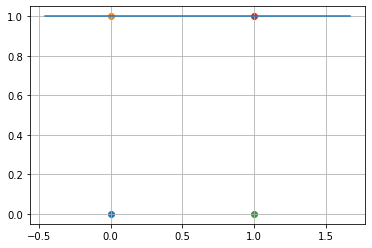

Updated Weights: W1- 1 W2- 1 Updated Bias: 0


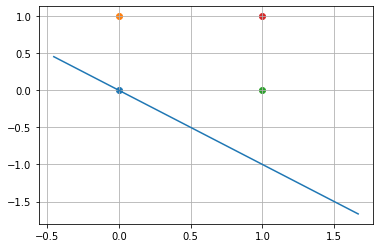

Updated Weights: W1- 1 W2- 1 Updated Bias: -1


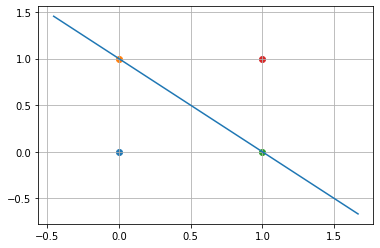

Updated Weights: W1- 1 W2- 0 Updated Bias: -2


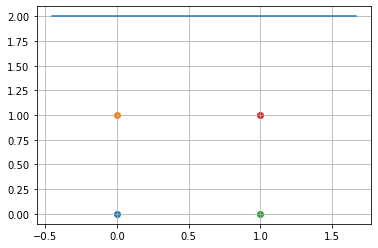

Updated Weights: W1- 2 W2- 1 Updated Bias: -1


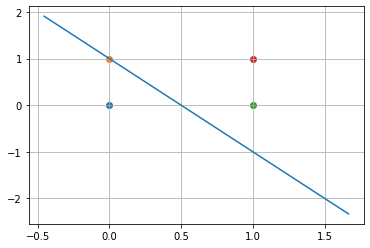

Updated Weights: W1- 2 W2- 0 Updated Bias: -2


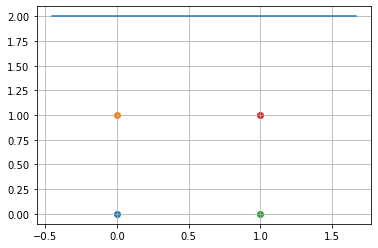

Updated Weights: W1- 1 W2- 0 Updated Bias: -3


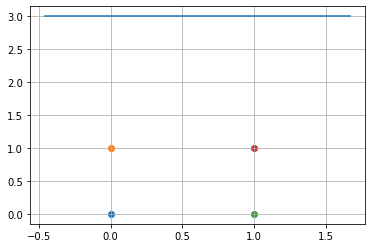

Updated Weights: W1- 2 W2- 1 Updated Bias: -2


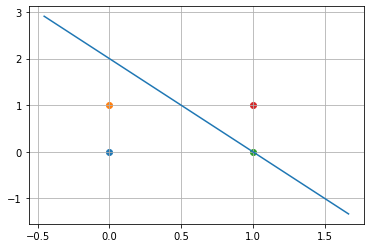

Updated Weights: W1- 1 W2- 1 Updated Bias: -3


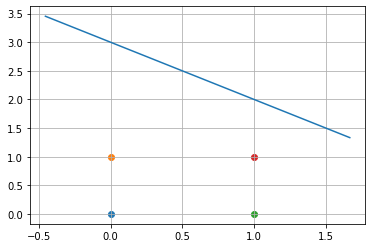

Updated Weights: W1- 2 W2- 2 Updated Bias: -2


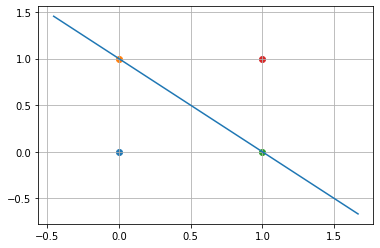

Updated Weights: W1- 2 W2- 1 Updated Bias: -3


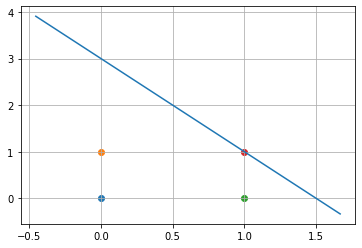

Final Weights: [2, 1] Final Bias: -3 Total Number of Updates: 11


In [ ]:
model = trainingPerceptron(X,y,10,2)
filename = '/content/drive/MyDrive/DL/Assignment-1/Q1_AND.sav'
pickle.dump(model, open(filename, 'wb'))
w,b,updates = pickle.load(open(filename, 'rb'))

In [ ]:
prediction(0,1)

0


# For OR 

Updated Weights: W1- 0 W2- 0 Updated Bias: -1


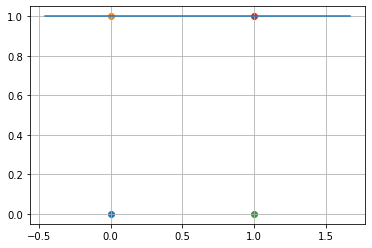

Updated Weights: W1- 0 W2- 1 Updated Bias: 0


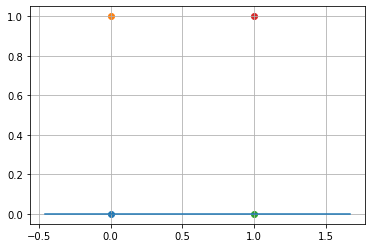

Updated Weights: W1- 0 W2- 1 Updated Bias: -1


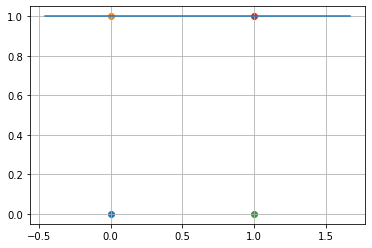

Updated Weights: W1- 1 W2- 1 Updated Bias: 0


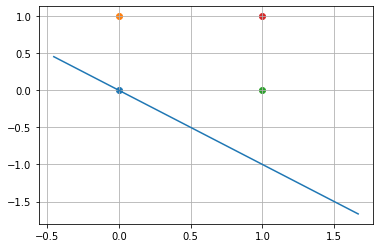

Updated Weights: W1- 1 W2- 1 Updated Bias: -1


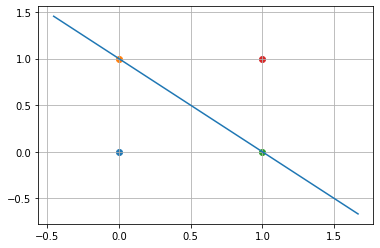

Final Weights: [1, 1] Final Bias: -1 Total Number of Updates: 5


In [ ]:
model2 = trainingPerceptron(X1,y1,10,2)
filename = '/content/drive/MyDrive/DL/Assignment-1/Q1_OR.sav'
pickle.dump(model2, open(filename, 'wb'))
w,b,updates = pickle.load(open(filename, 'rb'))

In [ ]:
prediction(0,1)

1


# For NOT

Updated Weight: -1 Updated Bias: -1


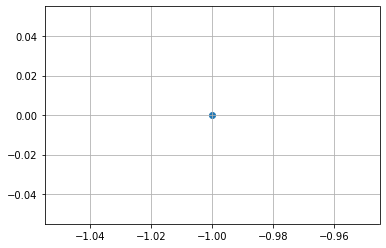

Updated Weight: -1 Updated Bias: 0


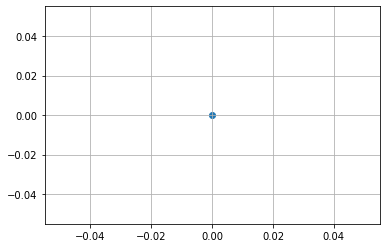

Final Weights: [-1] Final Bias: 0 Total Number of Updates: 2


In [ ]:
model3 = trainingPerceptron(X2,y2,10,1)
filename = '/content/drive/MyDrive/DL/Assignment-1/Q1_NOT.sav'
pickle.dump(model3, open(filename, 'wb'))
w,b,updates = pickle.load(open(filename, 'rb'))

In [ ]:
prediction(1)

0


# XOR

Updated Weights: W1- 0 W2- 0 Updated Bias: -1


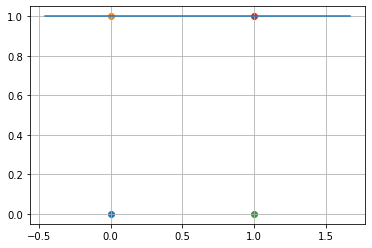

Updated Weights: W1- 0 W2- 1 Updated Bias: 0


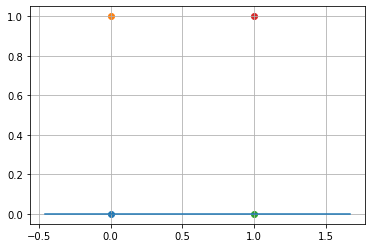

Updated Weights: W1- -1 W2- 0 Updated Bias: -1


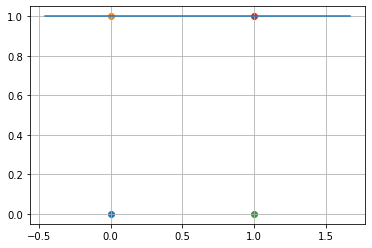

Updated Weights: W1- -1 W2- 1 Updated Bias: 0


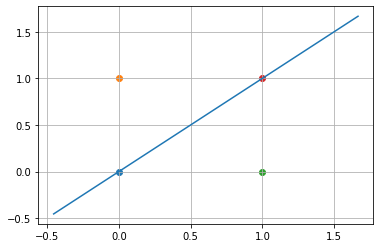

Updated Weights: W1- 0 W2- 1 Updated Bias: 1


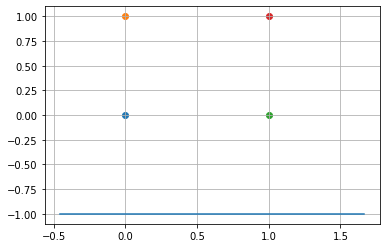

Updated Weights: W1- -1 W2- 0 Updated Bias: 0


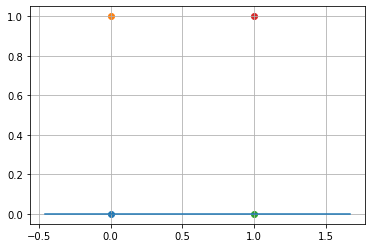

Updated Weights: W1- -1 W2- 0 Updated Bias: -1


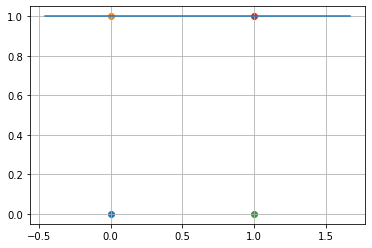

Updated Weights: W1- -1 W2- 1 Updated Bias: 0


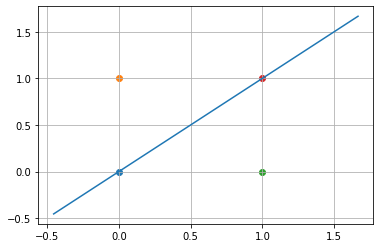

Updated Weights: W1- 0 W2- 1 Updated Bias: 1


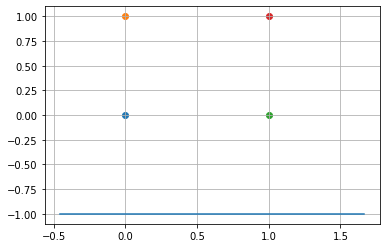

Updated Weights: W1- -1 W2- 0 Updated Bias: 0


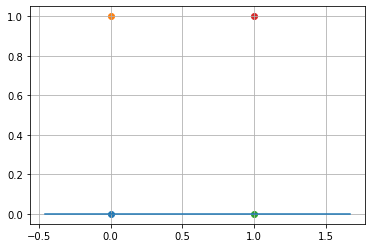

Updated Weights: W1- -1 W2- 0 Updated Bias: -1


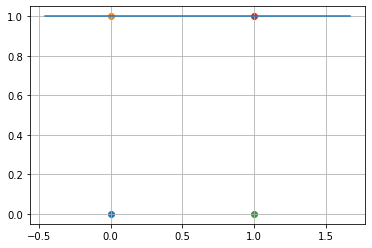

Updated Weights: W1- -1 W2- 1 Updated Bias: 0


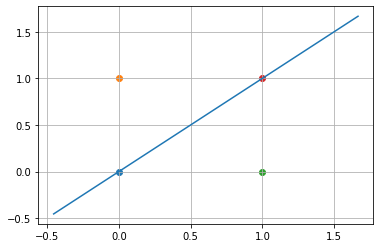

Updated Weights: W1- 0 W2- 1 Updated Bias: 1


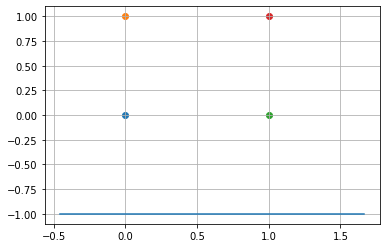

Updated Weights: W1- -1 W2- 0 Updated Bias: 0


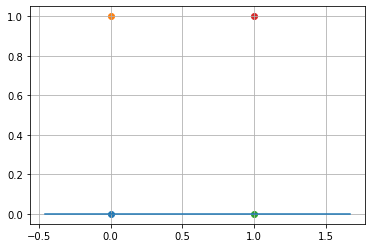

Updated Weights: W1- -1 W2- 0 Updated Bias: -1


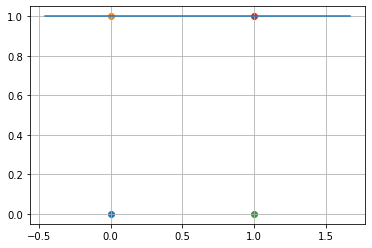

Updated Weights: W1- -1 W2- 1 Updated Bias: 0


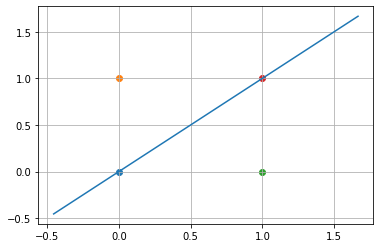

Updated Weights: W1- 0 W2- 1 Updated Bias: 1


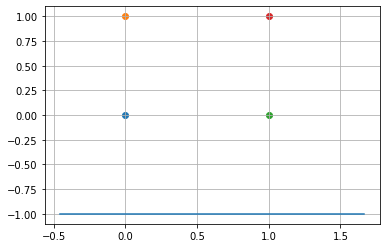

Updated Weights: W1- -1 W2- 0 Updated Bias: 0


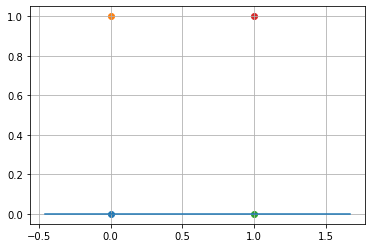

Updated Weights: W1- -1 W2- 0 Updated Bias: -1


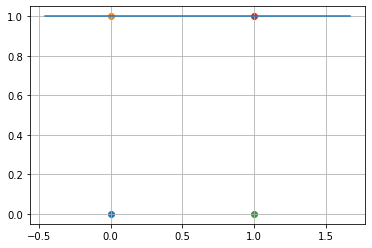

Updated Weights: W1- -1 W2- 1 Updated Bias: 0


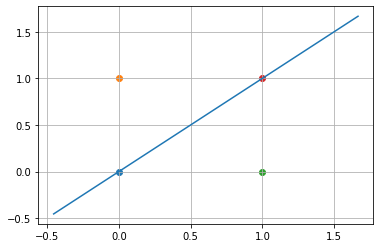

Updated Weights: W1- 0 W2- 1 Updated Bias: 1


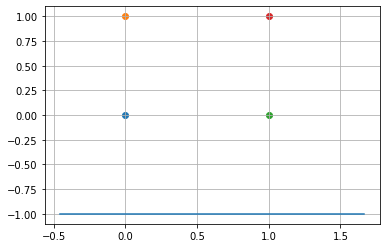

Updated Weights: W1- -1 W2- 0 Updated Bias: 0


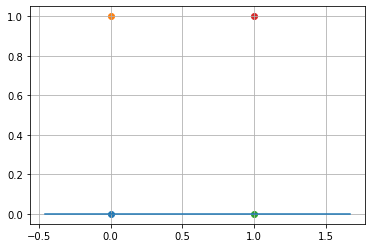

Updated Weights: W1- -1 W2- 0 Updated Bias: -1


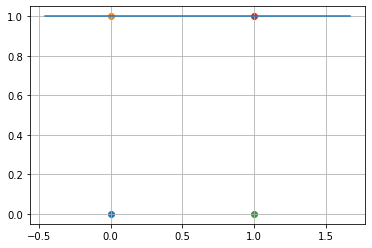

Updated Weights: W1- -1 W2- 1 Updated Bias: 0


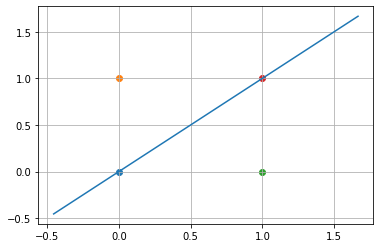

Updated Weights: W1- 0 W2- 1 Updated Bias: 1


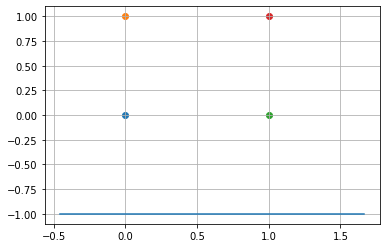

Updated Weights: W1- -1 W2- 0 Updated Bias: 0


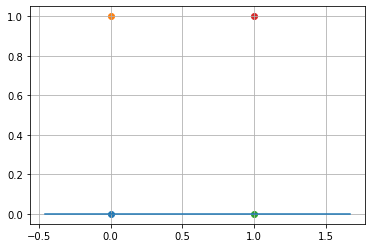

Updated Weights: W1- -1 W2- 0 Updated Bias: -1


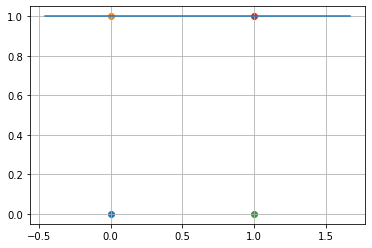

Updated Weights: W1- -1 W2- 1 Updated Bias: 0


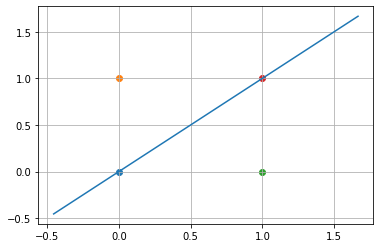

Updated Weights: W1- 0 W2- 1 Updated Bias: 1


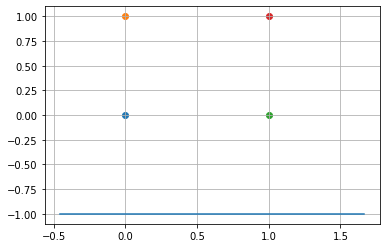

Updated Weights: W1- -1 W2- 0 Updated Bias: 0


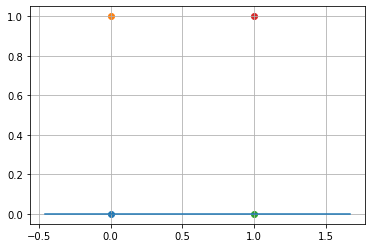

Updated Weights: W1- -1 W2- 0 Updated Bias: -1


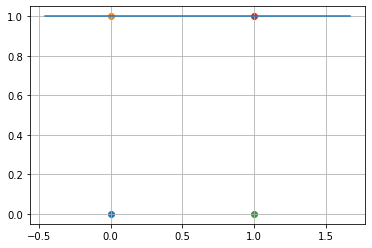

Updated Weights: W1- -1 W2- 1 Updated Bias: 0


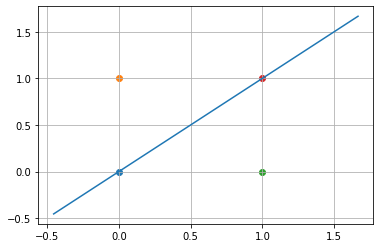

Updated Weights: W1- 0 W2- 1 Updated Bias: 1


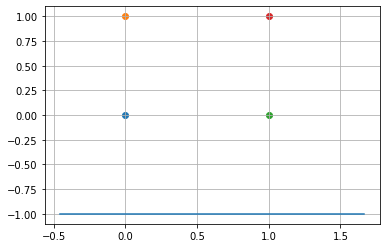

Updated Weights: W1- -1 W2- 0 Updated Bias: 0


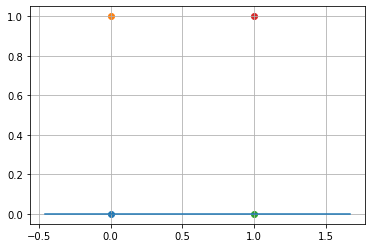

Updated Weights: W1- -1 W2- 0 Updated Bias: -1


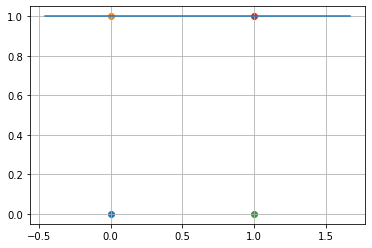

Updated Weights: W1- -1 W2- 1 Updated Bias: 0


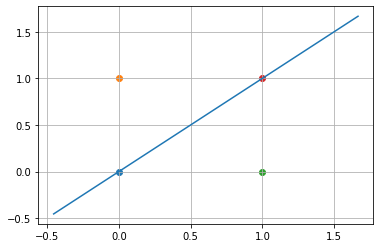

Updated Weights: W1- 0 W2- 1 Updated Bias: 1


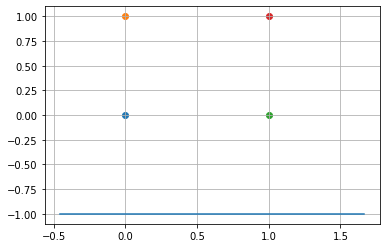

Updated Weights: W1- -1 W2- 0 Updated Bias: 0


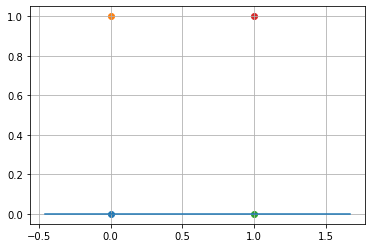

Final Weights: [-1, 0] Final Bias: 0 Total Number of Updates: 38


In [ ]:
Xor = [[0,0],[0,1],[1,0],[1,1]]
y_xor = [0,1,1,0]
model_xor = trainingPerceptron(Xor,y_xor,10,2)
filename = '/content/drive/MyDrive/DL/Assignment-1/Q1_XOR.sav'
pickle.dump(model_xor, open(filename, 'wb'))
w,b,updates = pickle.load(open(filename, 'rb'))

In [ ]:
prediction(0,1)

1
